Predicting Diagnosis Of Heart Disease Based On Age, Cholesterol, Blood Pressure Levels

Introduction:
Heart disease has been the leading cause of death in the United States since 1950. The term heart disease describes a range of conditions that could affect the heart. The most common heart diseases are coronary heart disease, peripheral artery disease, and aortic disease. Studies show that the leading risk factors for these diseases include high blood pressure and cholesterol. Specific medical conditions like unhealthy diets, physical inactivity, and smoking tend to put an individual at a higher risk. We aim to develop an accurate model to predict whether an individual has heart disease based on their cholesterol levels, heart rate and age. To approach this question, we will use three predictor values, heart rate, cholesterol levels, and age, from the heart data set containing 76 attributes. Hence, we would classify an individual as either positive or negative for Heart Disease.


Methods:
After we understand the dataset through exploratory data analysis and data preparation, we will aim to build diagnostic prediction models with a binary outcome. The heart disease database contains 76 attributes, however, the data set loaded for this project only includes 14 attributes. All of which, a single observation in the dataset represents an individual's health records, including their age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiography, max heart rate achieved, exercise, old peak, the slope of peak exercise, number of major vessels, and diagnosis status. Our models will only use three variables/columns: the person's age, cholesterol levels, and blood pressure. For our visualization, we will be using histograms to observe the distribution of different attributes. In our project, we will only plot the attributes relevant to our analysis: age, cholesterol, and blood pressure. Using histogram data makes it easy for us to identify that the three attributes are categorical, as if they were not, there would be significant gaps between each bar.

This project uses data from the Cleveland Clinic Foundation retreived from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

The predicted attribte is the "num" column which indicates the diagnosis of heart disease. According to the data description, a value of 0 means not likely to have heart disease; any value that is not 0 means patient is likely to have heart disease. To change the predicted attribute to be catagorical, the ifelse function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (not likely to have heart disease) or 1 (likely to have heart disease).

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

Expected outcomes and significance:
We expect that patients with high cholesterol and blood pressure levels are more likely to have heart disease than those with lower levels. We believe that age will also significantly affect our results as health issues are more common in older adults. This increases the awareness for heart disease and may lead to future questions that explore how we may treat illnesses like these more effectively or even prevent them.

In [13]:
library(tidyverse)
library(tidymodels)
library(repr)

In [14]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


 Demonstrate that the dataset can be read from the web into R Clean and wrangle your data into a tidy format Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [15]:
cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), cp = as.factor (cp), fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang), thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num)
cleve_clean

age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1


In [16]:
cleve_split <- initial_split(cleve_clean, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)

cleve_training

age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0


In [17]:
summarize_all <- cleve_training |>
                    group_by(diagnosis) |>
                    summarize(age = mean(age),
                              blood_pressure = mean(blood_pressure),
                              cholesterol = mean(cholesterol),
                              thalach = mean(thalach),
                              oldpeak = mean(oldpeak),
                              patient_count = n())

summarize_all

diagnosis,age,blood_pressure,cholesterol,thalach,oldpeak,patient_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,53.43089,130.3577,243.3902,158.0325,0.6276423,123
1,56.99038,135.6250,252.5288,139.4615,1.6125000,104


In [18]:
#How many people have heart disease and do not

diagnosis_data <- cleve_training |>
count(diagnosis)

diagnosis_data

diagnosis,n
<fct>,<int>
0,123
1,104


In [19]:
# there are no NAs within the data, but instead replaced with "?". Filtering columns one by one shows that there are missing
missing1 <- data |> 
summarize(ca) |>
filter(ca == "?")
missing1

missing2 <- data |> 
summarize(thal) |>
filter(thal == "?")
missing2

ca
<chr>
?
?
?
?


thal
<chr>
?
?


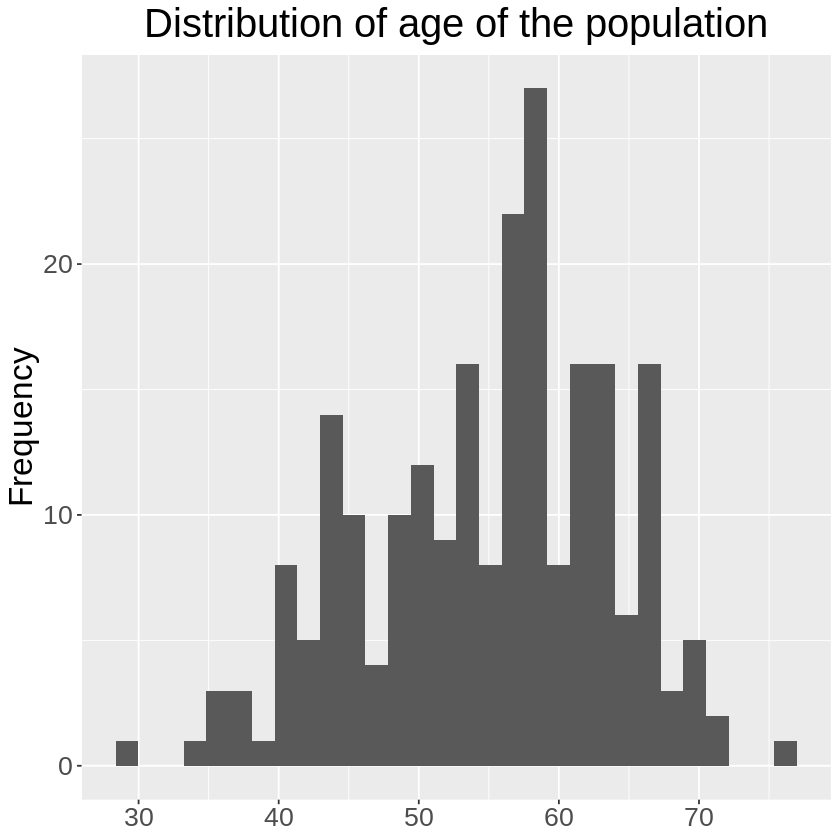

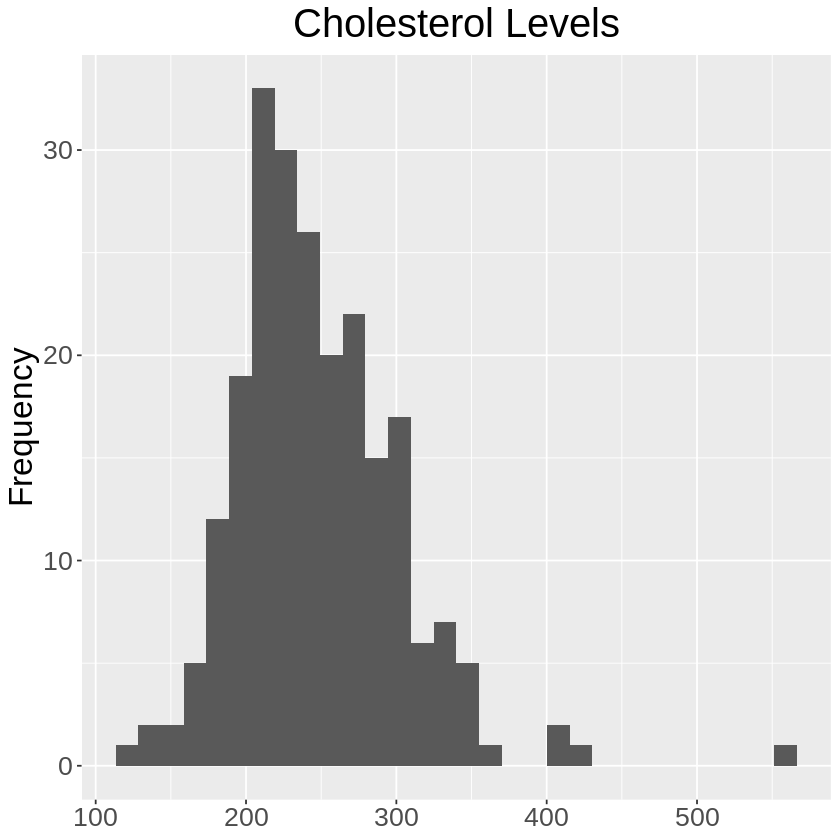

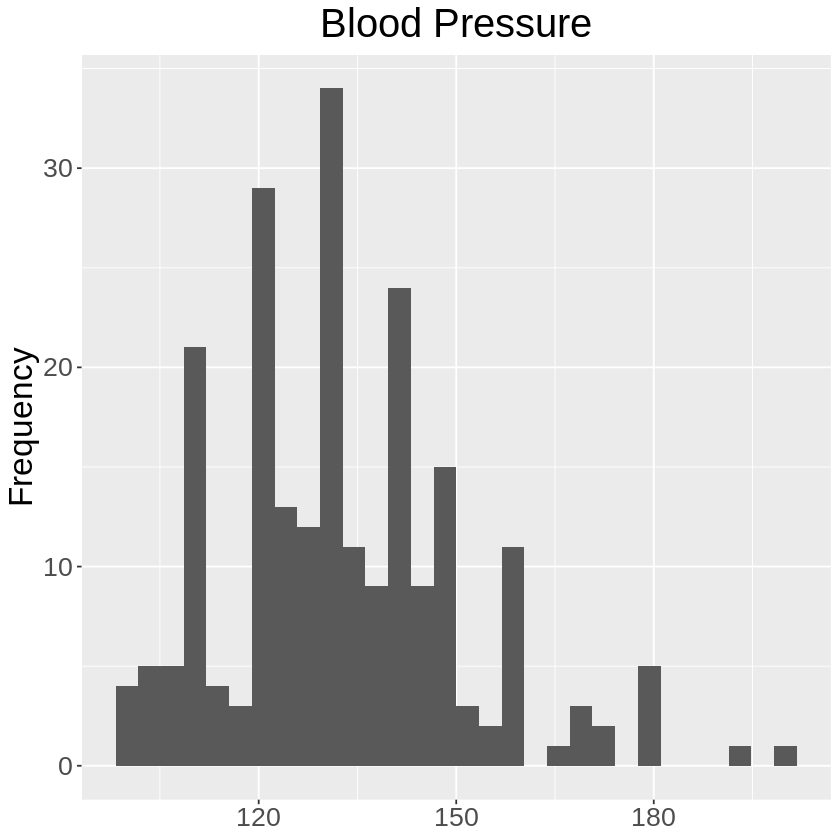

In [21]:
options(repr.plot.width = 7, repr.plot.height = 7)

age_plot <- ggplot(cleve_training, aes(x = age)) +
  geom_histogram(bins = 30) +
    labs(x = "Age", y = "Frequency") + 
    ggtitle("Distribution of age of the population") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

chol_plot <- ggplot(cleve_training, aes(x = cholesterol)) +
    geom_histogram(bins = 30) + 
    labs(x = "Cholesterol Levels", y = "Frequency") + 
    ggtitle("Cholesterol Levels") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

bp_plot <- ggplot(cleve_training, aes(x = blood_pressure)) +
    geom_histogram(bins = 30) +
    labs(x = "Blood Pressure", y = "Frequency") + 
    ggtitle("Blood Pressure") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

age_plot
chol_plot
bp_plot